In [1]:
%matplotlib inline

In [2]:
import numpy as np
data=np.load('/home/share/TmpData/Qinglin/HCP_Group/MOTOR100_0.2.npy')


In [3]:
data.shape



(5700, 228453)

In [4]:
from nilearn.decomposition.rbm import RBM

rbm1=RBM(data.shape[1],100)
rbm1.train(data)
h1=rbm1.predict(data)

rbm2=RBM(100,100)
rbm2.train(h1)
h2=rbm2.predict(h1)

rbm3=RBM(100,100)
rbm3.train(h2)

Epoch: 0 Error: 0.469710
Epoch: 1 Error: 0.478212
Epoch: 2 Error: 0.480798
Epoch: 3 Error: 0.484474
Epoch: 4 Error: 0.485051
Epoch: 5 Error: 0.486827
Epoch: 6 Error: 0.486573
Epoch: 7 Error: 0.486950
Epoch: 8 Error: 0.488490
Epoch: 9 Error: 0.487764
Epoch: 10 Error: 0.487314
Epoch: 11 Error: 0.488868
Epoch: 12 Error: 0.487694
Epoch: 13 Error: 0.488383
Epoch: 14 Error: 0.489003
Epoch: 15 Error: 0.486560
Epoch: 16 Error: 0.488071
Epoch: 17 Error: 0.485349
Epoch: 18 Error: 0.486776
Epoch: 19 Error: 0.487444
Epoch: 0 Error: 0.008947
Epoch: 1 Error: 0.008869
Epoch: 2 Error: 0.009117
Epoch: 3 Error: 0.009221
Epoch: 4 Error: 0.009041
Epoch: 5 Error: 0.009117
Epoch: 6 Error: 0.009254
Epoch: 7 Error: 0.008987
Epoch: 8 Error: 0.009059
Epoch: 9 Error: 0.009026
Epoch: 10 Error: 0.009006
Epoch: 11 Error: 0.008976
Epoch: 12 Error: 0.009399
Epoch: 13 Error: 0.009112
Epoch: 14 Error: 0.009035
Epoch: 15 Error: 0.009147
Epoch: 16 Error: 0.009185
Epoch: 17 Error: 0.009263
Epoch: 18 Error: 0.009259
Epoch:

1 plot layer1
-----------------------------------------------------------



In [5]:
#from nilearn.decomposition.rbm import getW

components_img=rbm1.getW()
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f93489cc470>,
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [6]:
components_img.shape

(228453, 100)

In [7]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:310: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

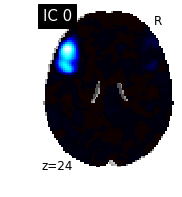

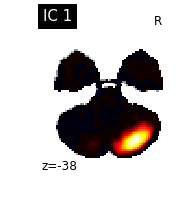

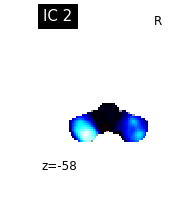

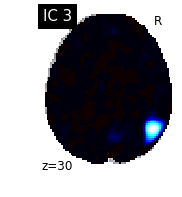

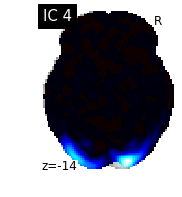

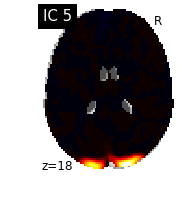

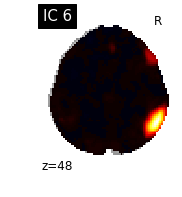

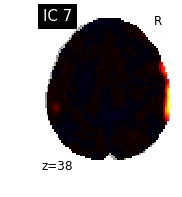

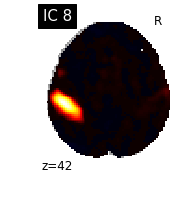

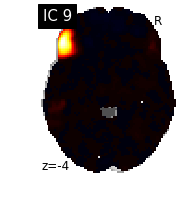

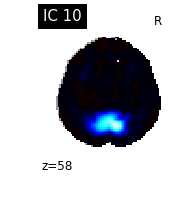

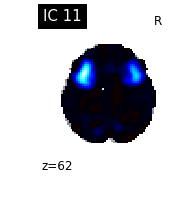

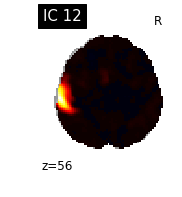

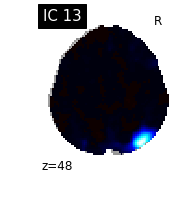

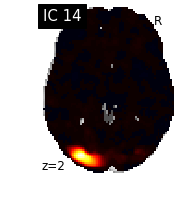

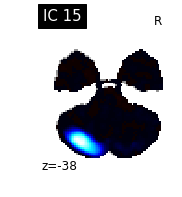

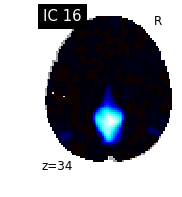

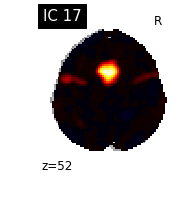

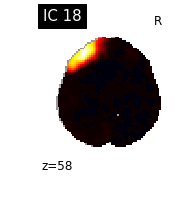

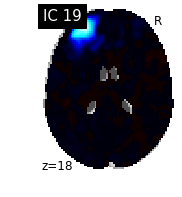

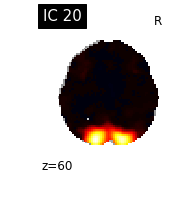

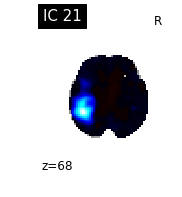

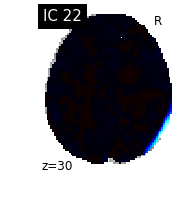

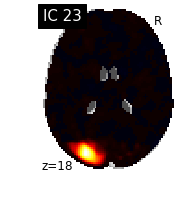

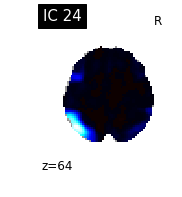

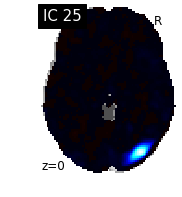

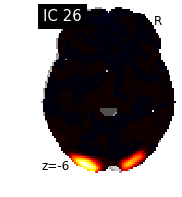

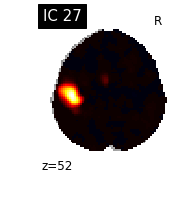

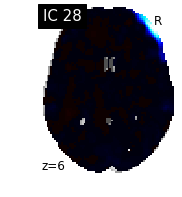

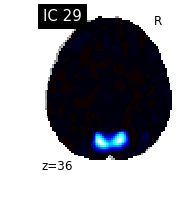

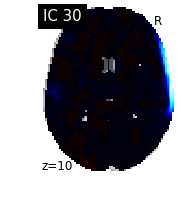

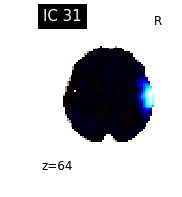

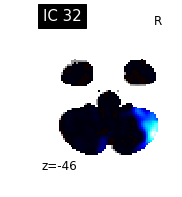

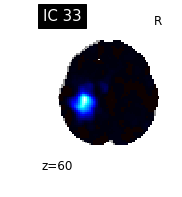

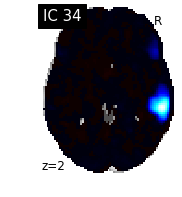

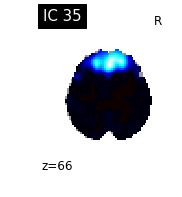

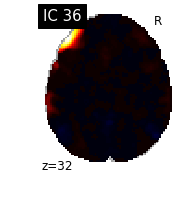

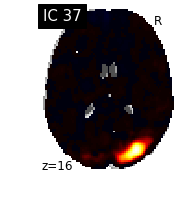

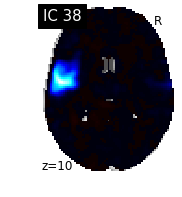

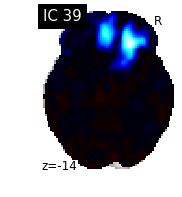

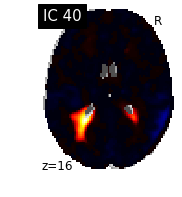

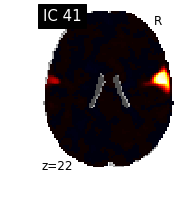

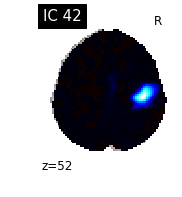

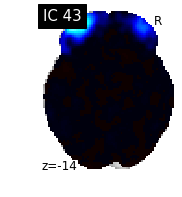

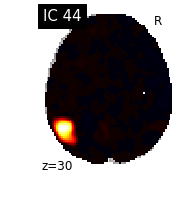

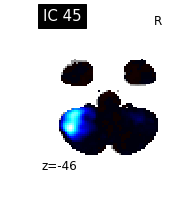

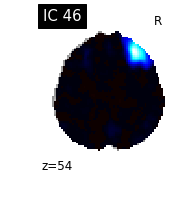

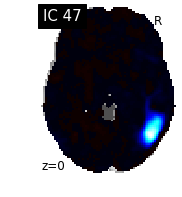

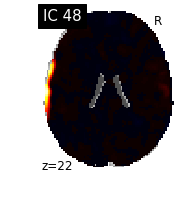

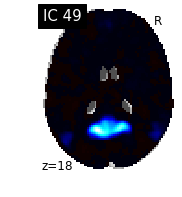

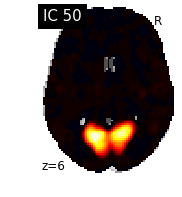

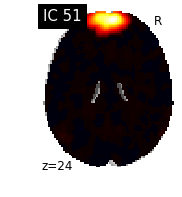

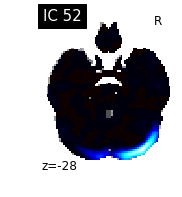

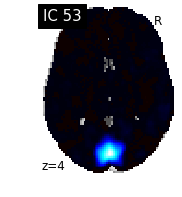

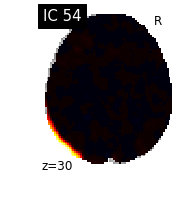

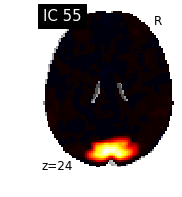

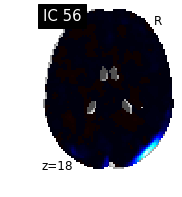

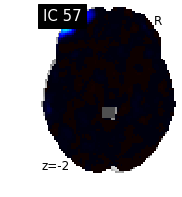

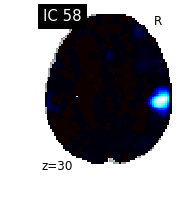

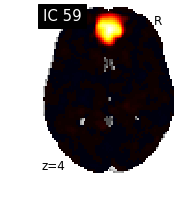

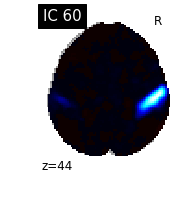

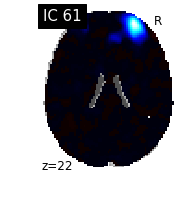

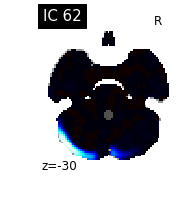

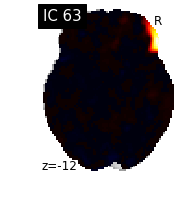

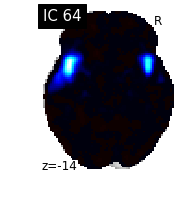

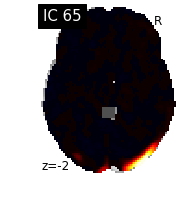

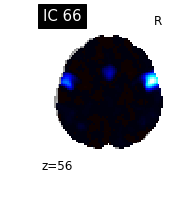

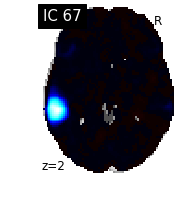

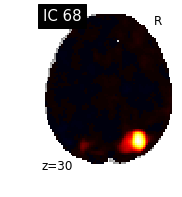

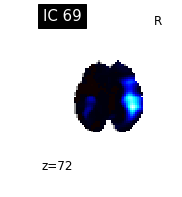

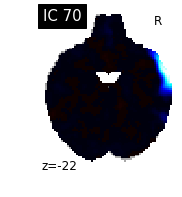

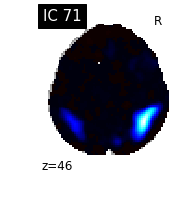

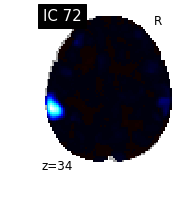

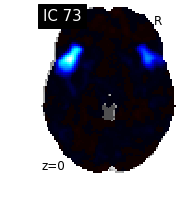

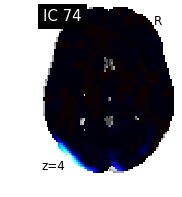

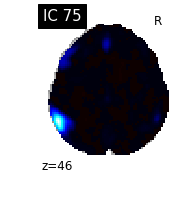

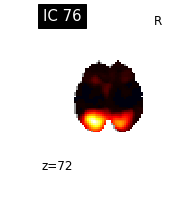

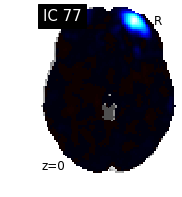

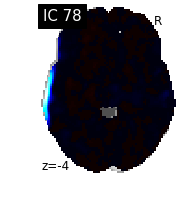

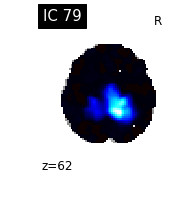

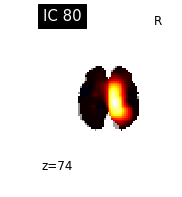

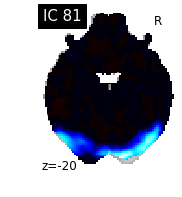

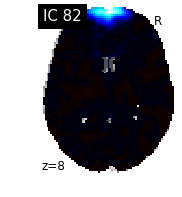

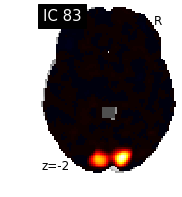

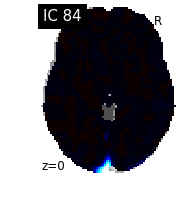

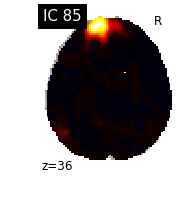

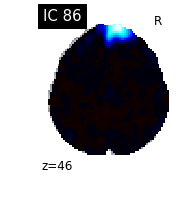

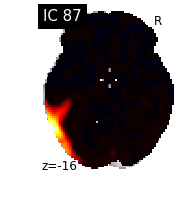

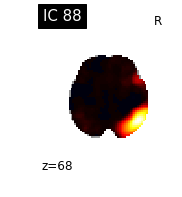

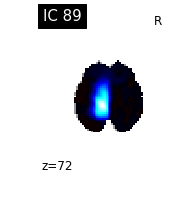

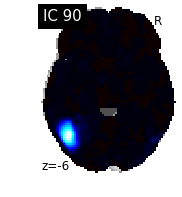

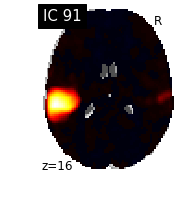

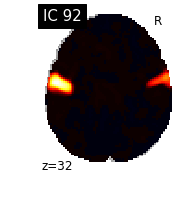

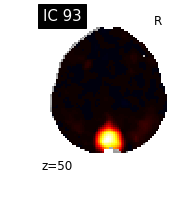

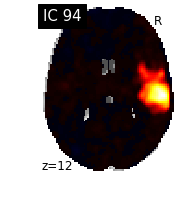

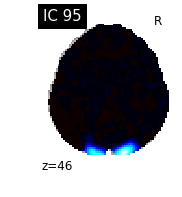

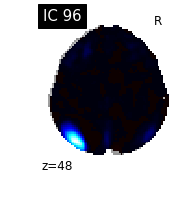

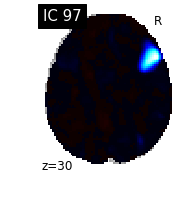

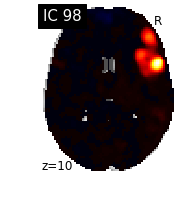

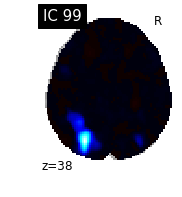

In [8]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [9]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: zero-size array to reduction operation maximum which has no identity

1 plot layer2
-----------------------------------------------------------



In [ ]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)

import scipy
scipy.stats.mstats.zscore(components_img,axis=1)


In [ ]:
components_img[np.absolute(components_img) < 1.7] = 0
components_img = masker.inverse_transform(components_img)

In [ ]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [ ]:
components_img.shape

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

1 plot layer3
-----------------------------------------------------------



In [ ]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
components_img=np.matmul(components_img,rbm3.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

In [ ]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)